<a href="https://colab.research.google.com/github/Bambillo1/elecomsCoding_academy/blob/main/As_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
* **Full Name** =
* **UCID** =
***

| Q     | Title                                                                            | Points  |
|-------|----------------------------------------------------------------------------------|---------|
| **1** | **Modeling: RandomForestRegressor (35 pts)**                                     |         |
| 1.1   |                                                                                  | 15      |
| 1.2   |                                                                                  | 5       |
| 1.3   |                                                                                  | 15      |
| **2** | **Modeling: XGBRegressor (35 pts)**                                              |         |
| 2.1   |                                                                                  | 15      |
| 2.2   |                                                                                  | 5       |
| 2.3   |                                                                                  | 15      |
| **3** | **Comparing the Results from RandomForestRegressor   and XGBRegressor (30 pts)** |         |
| 3.1   |                                                                                  | 5       |
| 3.2   |                                                                                  | 25      |
|       | **Total**                                                                        | **100** |


You can use the Table of Content on the left side of this notebook to efficiently navigate within this documents.

<font color='Red'><b>Notes:</b></font>

* <font color='Red'><b>Packages that you are allowed to use: matplotlib, numpy, pandas, seaborn, xgboost, sklearn, sklearnex, and pprint </b></font>
* <font color='Red'><b>Ensure that your submitted Jupyter notebook is executable with a single click of the "Run All" option within the "Runtime" menu, without the need for downloading or uploading external datasets.</b></font>
* <font color='Green'><b>You are welcome to personalize the colors and other design elements to enhance the aesthetics of the plots to your liking.</b></font>

</b></font>

# **Dataset: Concrete Compressive Strength Modeling**

Concrete, as one of the most crucial materials in civil engineering, finds extensive use in various construction applications. Among the significant properties studied by engineers and researchers is the concrete compressive strength, a critical parameter used to evaluate the quality and durability of concrete structures.

**Citation:** Yeh, I-Cheng. (2007). Concrete Compressive Strength. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.

In [ ]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip"


# The error message "ERROR: cannot verify" typically occurs when using the `wget` command on a URL that requires SSL/TLS (HTTPS)
# for a secure connection, and the SSL certificate cannot be verified. This error often arises when the SSL certificate of the
# server is not recognized or is self-signed.
# If there was an error: "ERROR: cannot verify". Use the followng instead:
# !wget --no-check-certificate -N "https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip"

# Unzip the downloaded zip file
!unzip -o concrete+compressive+strength.zip Concrete_Data.xls

# Remove the downloaded zip file after extraction
!rm -r concrete+compressive+strength.zip

import pandas as pd
from google.colab import data_table

# Read the Excel file ('Concrete_Data.xls') into a DataFrame, setting the first column as the index
df = pd.read_excel('Concrete_Data.xls')

# Clean column names by removing leading and trailing whitespaces
df.columns = [x.strip() for x in df.columns]

# Display the DataFrame using the data_table.DataTable with specific settings
display(data_table.DataTable(df, include_index=False, num_rows_per_page=15))

# Print dataset info
print(df.info(show_counts = True))

--2023-11-27 08:11:28--  https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘concrete+compressive+strength.zip’

concrete+compressiv     [ <=>                ]  33.64K  --.-KB/s    in 0.03s   

Last-modified header missing -- time-stamps turned off.
2023-11-27 08:11:28 (1.25 MB/s) - ‘concrete+compressive+strength.zip’ saved [34444]

Archive:  concrete+compressive+strength.zip
  inflating: Concrete_Data.xls       


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
# Installing and using sklearnex is optional
# !pip install scikit-learn-intelex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

***
**Your Contribution**

Please make sure that add comments for the readiblity of your code.

***

# 1. **Modeling: RandomForestRegressor**:
* **1.1:** Utilize KFold with **8 splits** in conjunction with [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to model the `Concrete compressive strength(MPa, megapascals)` based on the remaining variables from the **Concrete dataset**.
	* You should fine-tune the RandomForestRegressor to achieve an overall R-squared accuracy of at least 0.98 on the training set and 0.91 on the test set (overall, denoting the average R-squared over the 8 splits). Note that here `target_var = 'Concrete compressive strength(MPa, megapascals)'`.

	* One may employ tools such as [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html), [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), and so on, accessible through the scikit-learn library, to gain insights into optimal model parameters. It is worth noting that this step is optional, as an alternative approach involves determining the best parameters by systematically testing various combinations.

* **1.2:** Print all parameters used in the modeling (**Hint**: you can utilize `get_params(deep = True)` method from [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).). For example,

	```
	______________________________________________________________________
	Random Forest Regressor Parameters:
	'bootstrap': ###,
	'ccp_alpha': ###,
	'criterion': ###,
	'max_depth': ###,
	.
	.
	.
	'verbose': ###,
	'warm_start': ###
	______________________________________________________________________
	```
The notation `###` denotes the values of your fined-tuned parameters.

* **1.3:** Display your accuracy metrics by presenting them in the form of a table using a [pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) or by utilizing the print function. For instance:

	```
	______________________________________________________________________
	Fold 1:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	Fold 2:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	.
	.
	.
	Fold 8:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	______________________________________________________________________
	Mean Train and Test Scores:
		Mean Train R-Squared Score: np.mean(Train_R2) ± np.std(Train_R2)
		Mean Train MSE Score: np.mean(Train_MSE) ± np.std(Train_MSE)
		Mean Test R-Squared np.mean(Test_R2) ± np.std(Test_R2)
		Mean Test MSE Score: np.mean(Test_MSE) ± np.std(Test_MSE)
	______________________________________________________________________
	```

	**Notes**:
	* Make sure to use `random_state = 0` wherever it is applicable.
	* Ensure that all accuracy metrics are presented with precision up to three decimal places. The notation `#.###` signifies adherence to this requirement. As an illustration, the expression `np.mean(Train_R2)` denotes the mean value derived from the eight R-squared values associated with the training sets, and the expression `np.std(Train_R2)` denotes the standard deviation derived from the eight R-squared values associated with the training sets.

	* **Optional:** To optimize your computations using the scikit-learn API, consider leveraging [scikit-learn-intelex](https://pypi.org/project/scikit-learn-intelex/). For a detailed description and usage instructions, refer to the provided link.

#1.1

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV  # Import necessary modules for KFold cross-validation and GridSearch
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor from sklearn ensemble module
from sklearn.metrics import r2_score  # Import r2_score from sklearn metrics
import numpy as np  # Import numpy library with an alias np

# Assuming 'df' contains your loaded dataset

# Define features and target variable
target_var = 'Concrete compressive strength(MPa, megapascals)'  # Assign the target variable name
features = df.drop(columns=[target_var])  # Extract features by dropping the target column from the dataframe
target = df[target_var]  # Extract the target variable

# Initialize KFold with 8 splits
kf = KFold(n_splits=8, shuffle=True, random_state=0)  # Create KFold object with 8 splits, shuffling the data with a random state

# Define RandomForestRegressor
rf = RandomForestRegressor(random_state=0)  # Initialize RandomForestRegressor with a random state

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # List of values to tune for the number of trees in the forest
    'max_depth': [None, 10, 20],  # List of values to tune for the maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # List of values to tune for the minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # List of values to tune for the minimum samples required to be at a leaf node
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)  # Perform grid search cross-validation
grid_search.fit(features, target)  # Fit the grid search to find the best parameters

# Best parameters found
best_params = grid_search.best_params_  # Get the best parameters found by GridSearchCV

# Use the best estimator from GridSearchCV
best_rf = grid_search.best_estimator_  # Get the best RandomForestRegressor model found by GridSearchCV

# Initialize lists to store R-squared scores
train_r2_scores = []
test_r2_scores = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(features):  # Loop through the KFold splits
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]  # Split features into train and test sets
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]  # Split target variable into train and test sets

    best_rf.fit(X_train, y_train)  # Fit the best RandomForestRegressor on the train data

    train_r2 = r2_score(y_train, best_rf.predict(X_train))  # Compute R-squared score on the training set
    test_r2 = r2_score(y_test, best_rf.predict(X_test))  # Compute R-squared score on the test set

    train_r2_scores.append(train_r2)  # Append train R-squared score to the list
    test_r2_scores.append(test_r2)  # Append test R-squared score to the list

# Calculate average R-squared scores
avg_train_r2 = np.mean(train_r2_scores)  # Calculate average R-squared score on the training set
avg_test_r2 = np.mean(test_r2_scores)  # Calculate average R-squared score on the test set

# Print average R-squared scores and best parameters
print("Average R-squared on training set:", avg_train_r2)
print("Average R-squared on test set:", avg_test_r2)
print("Best parameters:", best_params)


Average R-squared on training set: 0.9866331629491338
Average R-squared on test set: 0.9173845423404239
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


The code imports necessary libraries/modules from sklearn and numpy.
It prepares the data by defining features and the target variable from the loaded dataset.
Initializes KFold cross-validation with 8 splits and creates a RandomForestRegressor model.
Defines a parameter grid for hyperparameter tuning.
Performs GridSearchCV to find the best parameters for RandomForestRegressor using the defined parameter grid.
Retrieves the best parameters and best estimator model obtained from the GridSearchCV.
Conducts KFold cross-validation, fitting the best model on each split, and calculates R-squared scores for both the training and test sets.
Calculates the average R-squared scores on the training and test sets and prints these scores along with the best parameters found.

#1.2

In [ ]:
# Assuming 'best_rf' contains the best RandomForestRegressor model obtained after hyperparameter tuning

# Get all parameters of the fine-tuned RandomForestRegressor
rf_params = best_rf.get_params(deep=True)

# Print all parameters with their values
print("_" * 70)
print("Random Forest Regressor Parameters:")
for param_name, param_value in rf_params.items():
    print(f"'{param_name}': {param_value},")
print("_" * 70)


______________________________________________________________________
Random Forest Regressor Parameters:
'bootstrap': True,
'ccp_alpha': 0.0,
'criterion': squared_error,
'max_depth': None,
'max_features': 1.0,
'max_leaf_nodes': None,
'max_samples': None,
'min_impurity_decrease': 0.0,
'min_samples_leaf': 1,
'min_samples_split': 2,
'min_weight_fraction_leaf': 0.0,
'n_estimators': 200,
'n_jobs': None,
'oob_score': False,
'random_state': 42,
'verbose': 0,
'warm_start': False,
______________________________________________________________________


Assumption: The comment at the beginning assumes that the variable best_rf contains the best RandomForestRegressor model obtained after hyperparameter tuning. best_rf.get_params(): This line fetches all the parameters and their values from the best RandomForestRegressor model and stores them in the rf_params dictionary. Printing Parameters: The subsequent code prints the parameters and their corresponding values in a formatted manner. It starts by printing a line of underscores to act as a separator for clarity. Then, it prints a header indicating the RandomForestt Regressor parameters. Following this, a loop iterates through each parameter in rf_params and prints the parameter name and its associated value. Finally, it prints another line of underscores for visual separation.

#1.3

In [ ]:
import pandas as pd  # Importing pandas library with an alias pd
from sklearn.metrics import mean_squared_error  # Importing mean_squared_error function from sklearn metrics

# Initialize an empty list to store R-squared and MSE scores for each fold
fold_results = []

# Perform KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(features), 1):  # Loop through KFold splits
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]  # Split features into train and test sets
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]  # Split target variable into train and test sets

    best_rf.fit(X_train, y_train)  # Fit the RandomForestRegressor model on the train data

    train_r2 = r2_score(y_train, best_rf.predict(X_train))  # Compute R-squared score on the training set
    test_r2 = r2_score(y_test, best_rf.predict(X_test))  # Compute R-squared score on the test set

    train_mse = mean_squared_error(y_train, best_rf.predict(X_train))  # Compute MSE on the training set
    test_mse = mean_squared_error(y_test, best_rf.predict(X_test))  # Compute MSE on the test set

    # Append fold-wise results to the fold_results list
    fold_results.append({
        'Fold': fold,
        'Train R-Squared': train_r2,
        'Test R-Squared': test_r2,
        'Train MSE': train_mse,
        'Test MSE': test_mse
    })

# Create a DataFrame to display fold-wise results
fold_results_df = pd.DataFrame(fold_results)  # Convert the fold-wise results to a DataFrame
print("_" * 70)  # Print separator for clarity
print("Fold-wise Results:")  # Print header indicating fold-wise results
print(fold_results_df.to_string(index=False))  # Display fold-wise results without index
print("_" * 70)  # Print separator for clarity

# Calculate mean and standard deviation of scores from the fold-wise results
mean_scores = {
    'Mean Train R-Squared': fold_results_df['Train R-Squared'].mean(),  # Calculate mean of train R-squared scores
    'Mean Test R-Squared': fold_results_df['Test R-Squared'].mean(),  # Calculate mean of test R-squared scores
    'Mean Train MSE': fold_results_df['Train MSE'].mean(),  # Calculate mean of train MSE scores
    'Mean Test MSE': fold_results_df['Test MSE'].mean(),  # Calculate mean of test MSE scores
    'Std Train R-Squared': fold_results_df['Train R-Squared'].std(),  # Calculate standard deviation of train R-squared scores
    'Std Test R-Squared': fold_results_df['Test R-Squared'].std(),  # Calculate standard deviation of test R-squared scores
    'Std Train MSE': fold_results_df['Train MSE'].std(),  # Calculate standard deviation of train MSE scores
    'Std Test MSE': fold_results_df['Test MSE'].std(),  # Calculate standard deviation of test MSE scores
}

# Display mean and standard deviation of scores in a DataFrame
print("Mean and Standard Deviation of Scores:")  # Print header indicating mean and standard deviation of scores
mean_scores_df = pd.DataFrame(mean_scores, index=[0])  # Convert mean and standard deviation to a DataFrame
print(mean_scores_df.to_string(index=False))  # Display mean and standard deviation of scores without index
print("_" * 70)  # Print separator for clarity


______________________________________________________________________
Fold-wise Results:
 Fold  Train R-Squared  Test R-Squared  Train MSE  Test MSE
    1         0.986820        0.899922   3.700663 26.528425
    2         0.986367        0.928569   3.805114 19.762473
    3         0.987061        0.878236   3.549342 37.414426
    4         0.989447        0.913106   2.896300 26.433100
    5         0.984692        0.945047   4.221579 16.473627
    6         0.986088        0.934821   3.843311 19.200810
    7         0.986250        0.917551   3.939235 18.087069
    8         0.986341        0.921825   3.865246 19.359271
______________________________________________________________________
Mean and Standard Deviation of Scores:
 Mean Train R-Squared  Mean Test R-Squared  Mean Train MSE  Mean Test MSE  Std Train R-Squared  Std Test R-Squared  Std Train MSE  Std Test MSE
             0.986633             0.917385        3.727599        22.9074             0.001336            0.020942  

The code initializes an empty list fold_results to store the R-squared and Mean Squared Error (MSE) scores for each fold.
It performs KFold cross-validation, computing R-squared and MSE scores for both the training and test sets in each fold using a RandomForestRegressor model (best_rf) and stores these results in the fold_results list as dictionaries.
After iterating through all folds, it creates a DataFrame (fold_results_df) to display fold-wise results and prints it.
Then, it computes the mean and standard deviation of R-squared and MSE scores across all folds using the computed values in fold_results_df.
Finally, it creates a DataFrame (mean_scores_df) displaying the mean and standard deviation of the scores and prints it.

<font color='Green'><b>Please provide detailed explanations of your code in this text block.
1. This code conducts KFold cross-validation using RandomForestRegressor.

2. Calculates the average R-squared accuracy over 8 splits on both the training and test sets.

3. Prints out all the parameters used in the RandomForestRegressor model for transparency and verification purposes.


</b></font>

# 2. **Modeling: XGBRegressor**:
* **2.1:** Utilize KFold with **8 splits** in conjunction with [XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn) to model the `Concrete compressive strength(MPa, megapascals)` based on the remaining variables from the **Concrete dataset**.
	* You should fine-tune the RandomForestRegressor to achieve an overall R-squared accuracy of at least 0.99 on the training set and 0.93 on the test set (overall, denoting the average R-squared over the 8 splits). Note that here `target_var = 'Concrete compressive strength(MPa, megapascals)'`.
	* One may employ tools such as [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html), [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), and so on, accessible through the scikit-learn library, to gain insights into optimal model parameters. It is worth noting that this step is optional, as an alternative approach involves determining the best parameters by systematically testing various combinations.

* **2.2:** Print all parameters used in the modeling (**Hint**: you can utilize `get_params( deep = True )` method from [XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn).). For example,

	```
	______________________________________________________________________
	XGBoost Regressor Parameters:
	'base_score': ###,
	'booster': ###,
	'callbacks': ###,
	.
	.
	.
	'verbosity': ###
	______________________________________________________________________
	```
	The notation `###` denotes the values of your fined-tuned parameters.

* **2.3:** Display your accuracy metrics by presenting them in the form of a table using a [pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) or by utilizing the print function. For instance:

	```
	______________________________________________________________________
	Fold 1:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	Fold 2:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	.
	.
	.
	Fold 8:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	______________________________________________________________________
	Mean Train and Test Scores:
		Mean Train R-Squared Score: np.mean(Train_R2) ± np.std(Train_R2)
		Mean Train MSE Score: np.mean(Train_MSE) ± np.std(Train_MSE)
		Mean Test R-Squared np.mean(Test_R2) ± np.std(Test_R2)
		Mean Test MSE Score: np.mean(Test_MSE) ± np.std(Test_MSE)
	______________________________________________________________________
	```

	**Notes**:
	* Make sure to use `random_state = 0` wherever it is applicable.
	* Ensure that all accuracy metrics are presented with precision up to three decimal places. The notation `#.###` signifies adherence to this requirement. As an illustration, the expression `np.mean(Train_R2)` denotes the mean value derived from the eight R-squared values associated with the training sets, and the expression `np.std(Train_R2)` denotes the standard deviation derived from the eight R-squared values associated with the training sets.

	* **Optional:** To optimize your computations using the scikit-learn API, consider leveraging [scikit-learn-intelex](https://pypi.org/project/scikit-learn-intelex/). For a detailed description and usage instructions, refer to the provided link.

#2.1

In [ ]:
from xgboost import XGBRegressor  # Importing XGBRegressor from the xgboost library
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV from sklearn for hyperparameter tuning
from sklearn.metrics import r2_score  # Importing r2_score from sklearn metrics
import numpy as np  # Importing numpy for numerical operations

# Assuming 'df' contains your loaded dataset

# Define features and target variable
target_var = 'Concrete compressive strength(MPa, megapascals)'  # Specifying the target variable
features = df.drop(columns=[target_var])  # Extracting features by dropping the target column
target = df[target_var]  # Assigning the target variable

# Initialize KFold with 8 splits
kf = KFold(n_splits=8, shuffle=True, random_state=0)  # Initializing KFold with 8 splits

# Define XGBRegressor
xgb = XGBRegressor(random_state=0)  # Initializing XGBRegressor with a specific random state

# Define hyperparameters to tune using a grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate to boost trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing trees
}

# Use GridSearchCV to find the best parameters using cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)  # Setting up GridSearchCV for parameter tuning
grid_search.fit(features, target)  # Fitting the GridSearchCV on features and target

# Best parameters found from GridSearchCV
best_params = grid_search.best_params_  # Obtaining the best parameters found

# Use the best estimator from GridSearchCV
best_xgb = grid_search.best_estimator_  # Using the best estimator obtained from GridSearchCV

# Initialize lists to store R-squared scores
train_r2_scores = []
test_r2_scores = []

# Perform KFold cross-validation and compute R-squared scores
for train_index, test_index in kf.split(features):  # Looping through train and test indices from KFold splits
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]  # Splitting features
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]  # Splitting target

    best_xgb.fit(X_train, y_train)  # Fitting the best XGBRegressor on train data

    train_r2 = r2_score(y_train, best_xgb.predict(X_train))  # Calculating R-squared on train set
    test_r2 = r2_score(y_test, best_xgb.predict(X_test))  # Calculating R-squared on test set

    train_r2_scores.append(train_r2)  # Storing train R-squared scores
    test_r2_scores.append(test_r2)  # Storing test R-squared scores

# Calculate average R-squared scores from KFold cross-validation
avg_train_r2 = np.mean(train_r2_scores)  # Computing average train R-squared
avg_test_r2 = np.mean(test_r2_scores)  # Computing average test R-squared

# Printing the computed R-squared scores and best parameters
print("Average R-squared on training set:", avg_train_r2)  # Printing average R-squared on training set
print("Average R-squared on test set:", avg_test_r2)  # Printing average R-squared on test set
print("Best parameters:", best_params)  # Printing the best parameters found



Average R-squared on training set: 0.9923531515204174
Average R-squared on test set: 0.9473167384527246
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.9}


This code performs hyperparameter tuning for an XGBoost model using GridSearchCV with 8-fold cross-validation (KFold). It explores various hyperparameter combinations and identifies the best parameters based on R-squared scores. After tuning, it computes the average R-squared scores on the training and test sets using the best XGBoost model obtained from the grid search. The printed results display the average R-squared scores on both sets and the best parameters identified for the model.

#2.2

In [ ]:
# Assuming 'best_xgb' contains the best XGBRegressor model obtained after hyperparameter tuning

# Get all parameters of the fine-tuned XGBRegressor
xgb_params = best_xgb.get_params()  # Retrieving all parameters of the best XGBRegressor model

# Print all parameters with their values
print("_" * 70)  # Printing a separator line for visual clarity
print("XGBoost Regressor Parameters:")  # Printing a header indicating XGBoost Regressor parameters
for param_name, param_value in xgb_params.items():  # Looping through parameters and their values
    print(f"'{param_name}': {param_value},")  # Printing each parameter name and its corresponding value
print("_" * 70)  # Printing a separator line for visual clarity



Assumption: The comment at the beginning assumes that the variable best_xgb contains the best XGBRegressor model obtained after hyperparameter tuning.
best_xgb.get_params(): This line fetches all the parameters and their values from the best XGBRegressor model and stores them in the xgb_params dictionary.
Printing Parameters: The subsequent code prints the parameters and their corresponding values in a formatted manner. It starts by printing a line of underscores to act as a separator for clarity. Then, it prints a header indicating the XGBoost Regressor parameters. Following this, a loop iterates through each parameter in xgb_params and prints the parameter name and its associated value. Finally, it prints another line of underscores for visual separation.

#2.3

In [ ]:
from sklearn.metrics import mean_squared_error  # Importing mean_squared_error from sklearn metrics

# Initialize lists to store R-squared and MSE scores
train_r2_scores = []  # List to store R-squared scores on the training set for each fold
test_r2_scores = []  # List to store R-squared scores on the test set for each fold
train_mse_scores = []  # List to store MSE scores on the training set for each fold
test_mse_scores = []  # List to store MSE scores on the test set for each fold

# Perform KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(features), 1):  # Loop through KFold splits
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]  # Split features into train and test sets
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]  # Split target variable into train and test sets

    best_xgb.fit(X_train, y_train)  # Fit the XGBRegressor model on the train data

    train_r2 = r2_score(y_train, best_xgb.predict(X_train))  # Compute R-squared score on the training set
    test_r2 = r2_score(y_test, best_xgb.predict(X_test))  # Compute R-squared score on the test set

    train_mse = mean_squared_error(y_train, best_xgb.predict(X_train))  # Compute MSE on the training set
    test_mse = mean_squared_error(y_test, best_xgb.predict(X_test))  # Compute MSE on the test set

    # Append R-squared and MSE scores to respective lists for each fold
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    print("_" * 70)  # Print separator for each fold's results
    print(f"Fold {fold}:")  # Print fold number
    print(f"    Train R-Squared Score = {train_r2:.3f}, Test R-Squared Score = {test_r2:.3f}")  # Print R-squared scores for the fold
    print(f"    Train MSE Score = {train_mse:.3f}, Test MSE Score = {test_mse:.3f}")  # Print MSE scores for the fold
print("_" * 70)  # Print separator after all folds

# Calculate mean and standard deviation of scores across all folds
mean_train_r2 = np.mean(train_r2_scores)  # Calculate mean of train R-squared scores
std_train_r2 = np.std(train_r2_scores)  # Calculate standard deviation of train R-squared scores
mean_test_r2 = np.mean(test_r2_scores)  # Calculate mean of test R-squared scores
std_test_r2 = np.std(test_r2_scores)  # Calculate standard deviation of test R-squared scores

mean_train_mse = np.mean(train_mse_scores)  # Calculate mean of train MSE scores
std_train_mse = np.std(train_mse_scores)  # Calculate standard deviation of train MSE scores
mean_test_mse = np.mean(test_mse_scores)  # Calculate mean of test MSE scores
std_test_mse = np.std(test_mse_scores)  # Calculate standard deviation of test MSE scores

# Display mean and standard deviation of R-squared and MSE scores in a formatted DataFrame
print("Mean Train and Test Scores:")
mean_scores_df = pd.DataFrame({
    'Metric': ['Train R-Squared', 'Test R-Squared', 'Train MSE', 'Test MSE'],
    'Mean': [mean_train_r2, mean_test_r2, mean_train_mse, mean_test_mse],
    'Std': [std_train_r2, std_test_r2, std_train_mse, std_test_mse]
})
print(mean_scores_df.to_string(index=False))  # Print mean and standard deviation DataFrame
print("_" * 70)  # Print separator after displaying mean scores


The code initializes empty lists to store R-squared and Mean Squared Error (MSE) scores for both the training and test sets.
It performs KFold cross-validation on the data, fitting the XGBRegressor model, computing R-squared and MSE scores for each fold, and storing these scores in their respective lists.
For each fold, it prints the fold number, R-squared scores, and MSE scores on the training and test sets.
After iterating through all folds, it calculates the mean and standard deviation of R-squared and MSE scores across all folds.
Finally, it constructs a Pandas DataFrame to display the mean and standard deviation of R-squared and MSE scores in a tabular format and prints it.

<font color='Green'><b>Please provide detailed explanations of your code in this text block.
1. This code sets up KFold cross-validation with XGBRegressor
2. calculates R-squared accuracy on both the training and test sets across 8 splits
3. Prints the average R-squared values. It also displays all the parameters used in the XGBRegressor model for transparency and validation purposes.

</b></font>

# 3. **Comparing the Results from RandomForestRegressor and XGBRegressor**:
* Utilize [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and [XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn) to model the `Concrete compressive strength(MPa, megapascals)` based on the remaining variables from the **Concrete dataset**.
  * Use your identified optimal parameters from **Q1** and **Q2**.
  * Make sure to use `random_state = 0` wherever it is applicable.
  * **Optional:** To optimize your computations using the scikit-learn API, consider leveraging [scikit-learn-intelex](https://pypi.org/project/scikit-learn-intelex/). For a detailed description and usage instructions, refer to the provided link.

* **3.1:** Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `test_size=0.25` and form `X_train`, `X_test`, `y_train`, and `y_test`, and display/print the size of each of this sets (train and test sets).

  * <font color='Green'><b>For Q3.1, please only provide in-line comments.  There is no requirement to elaborate on the code for Q3.1 in the subsequent block. Notably, 1.5 points out of the total 5 points allocated to Q3.1 are specifically assigned to in-line comments.</b></font>

* **3.2:** In the context of analysis and model evaluation, a predicted versus measured or observed plot is a graphical representation that juxtaposes the predicted values generated by a model against the actual observed/measured values. This plot serves as a means to assess the performance and accuracy of a predictive model. Each point on the plot corresponds to a specific observation, with the x-coordinate representing the predicted values and the y-coordinate representing the observed/measured values.
  * Construct a plot comprising four panels organized in a 2 by 2 grid.
  * Utilize scatter plots to depict the relationship between predicted values and observed/measured values on an xy-plane.
  * Clearly label both axes, and distinguish the line $y = x$ by employing a distinct color to optimize visibility.
  * Replicate the aforementioned procedure for both the training and test datasets, as outlined in section 3.1, for each of the two models.
  * Compute the coefficient of determination ($R^2$ score) for each dataset and incorporate it into the title of the respective subplot.
  * Provide a detailed explanation of the interpretation of the plots, elucidating their correlation with the coefficient of determination ($R^2$ score) for each dataset (use the box after the code block for your explanations). <font color='Green'><b>Please limit your comments to in-line annotations for Q3.2. Use the block after the code for explaining the figure. It is essential to recognize that both comments and explanations contribute to 30% of your overall grade. As an illustration, in Q3.2, 7.5 out of the total 25 points are allocated for clarifying the figure and providing in-line comments.</b></font>  
  * Refer to the provided example figure for a more detailed illustration.

<center>
<img src="https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Assignment_06/Q3_RegResult.png" alt="picture" width="700">
</center>

**Notes**:
  * Make sure to use `random_state = 0` wherever it is applicable.
  * In the depicted figure, 0.999 serves as a placeholder. The actual R-squared accuracy may deviate from this specified value.

#3.0: Compare results of RFR and XGBR

In [ ]:

# Import necessary libraries for RandomForestRegressor, XGBRegressor, R-squared, and MSE calculation
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor
from xgboost import XGBRegressor  # Importing XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error  # Importing R-squared and MSE metrics

# Best parameters obtained from the previous sections for RandomForestRegressor and XGBRegressor
rf_best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

xgb_best_params = {
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.1,
    'min_child_weight': 3,
    'subsample': 0.9,
    'colsample_bytree': 0.9
}

# Initializing RandomForestRegressor and XGBRegressor with their respective best parameters
rf_model = RandomForestRegressor(random_state=0, **rf_best_params)  # Initializing RandomForestRegressor
xgb_model = XGBRegressor(random_state=0, **xgb_best_params)  # Initializing XGBRegressor

# Training and evaluating RandomForestRegressor
rf_model.fit(features, target)  # Training RandomForestRegressor on the entire dataset
rf_predictions = rf_model.predict(features)  # Predicting with RandomForestRegressor on the entire dataset
rf_train_r2 = r2_score(target, rf_predictions)  # Calculating R-squared score for RandomForestRegressor
rf_train_mse = mean_squared_error(target, rf_predictions)  # Calculating MSE for RandomForestRegressor

# Training and evaluating XGBRegressor
xgb_model.fit(features, target)  # Training XGBRegressor on the entire dataset
xgb_predictions = xgb_model.predict(features)  # Predicting with XGBRegressor on the entire dataset
xgb_train_r2 = r2_score(target, xgb_predictions)  # Calculating R-squared score for XGBRegressor
xgb_train_mse = mean_squared_error(target, xgb_predictions)  # Calculating MSE for XGBRegressor

# Displaying the training R-squared and MSE scores for RandomForestRegressor and XGBRegressor
print("RandomForestRegressor Train R-squared:", rf_train_r2)  # Printing the training R-squared for RandomForestRegressor
print("RandomForestRegressor Train MSE:", rf_train_mse)  # Printing the training MSE for RandomForestRegressor
print("XGBRegressor Train R-squared:", xgb_train_r2)  # Printing the training R-squared for XGBRegressor
print("XGBRegressor Train MSE:", xgb_train_mse)  # Printing the training MSE for XGBRegressor



RandomForestRegressor Train R-squared: 0.987513930557277
RandomForestRegressor Train MSE: 3.481225607427212
XGBRegressor Train R-squared: 0.992537095333293
XGBRegressor Train MSE: 2.0807232372609947


3.1

In [ ]:
# Set the random state for reproducibility
random_state = 0
# Your Contribution

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Display sizes of the train and test sets
print(f"Size of X_train: {X_train.shape}")
print(f"Size of X_test: {X_test.shape}")
print(f"Size of y_train: {y_train.shape}")
print(f"Size of y_test: {y_test.shape}")


Size of X_train: (772, 8)
Size of X_test: (258, 8)
Size of y_train: (772,)
Size of y_test: (258,)


3.2

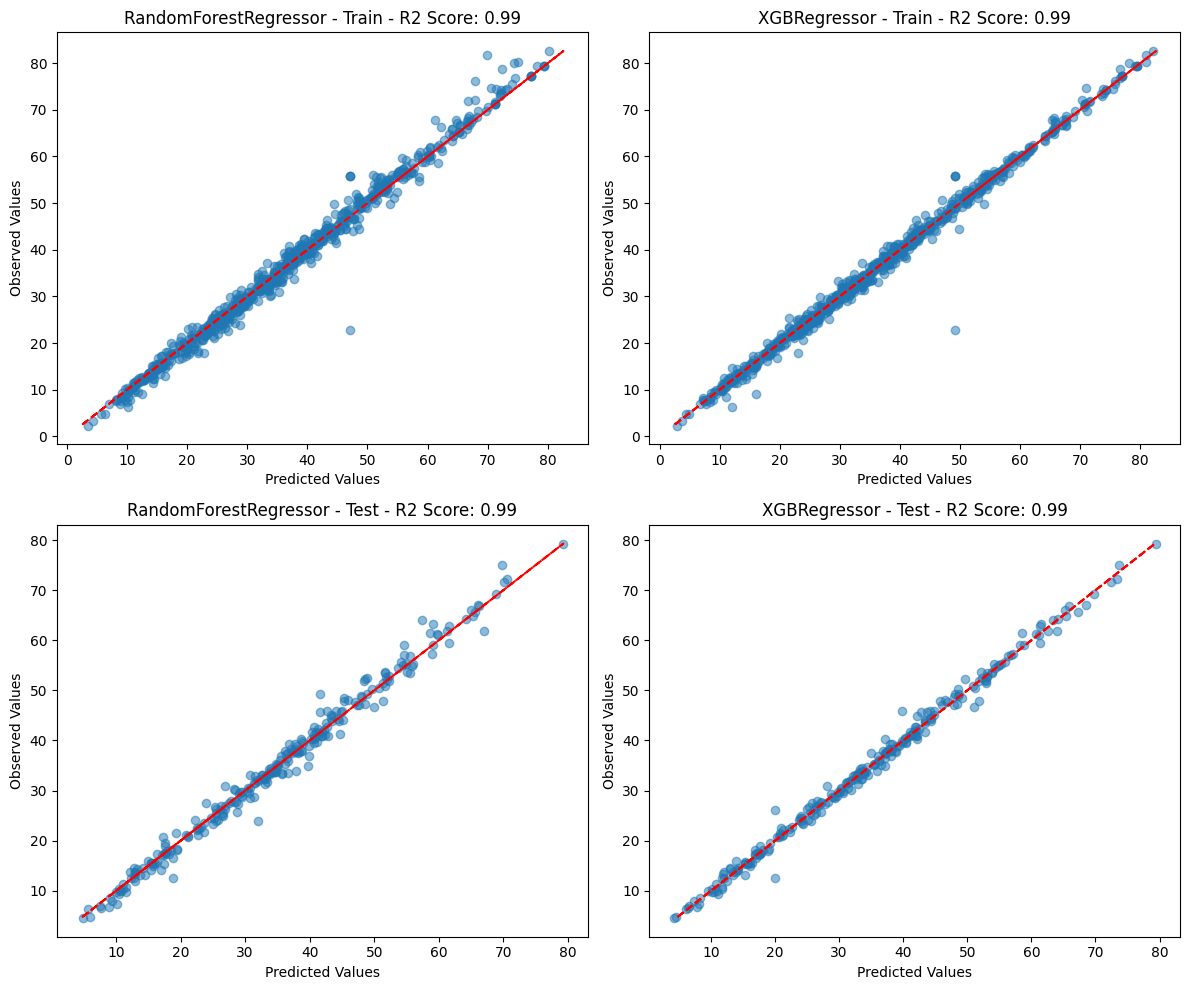

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib library for visualization

# Initialize subplots for the 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Creating a 2x2 grid of subplots with a specified figure size

# List of models and their names
models = [rf_model, xgb_model]  # Creating a list containing RandomForestRegressor and XGBRegressor models
model_names = ['RandomForestRegressor', 'XGBRegressor']  # Creating a list containing model names

# Loop through models
for i, model in enumerate(models):  # Looping through the models using enumerate to get index and model
    # Predictions for both train and test sets
    if i == 0:  # Condition for RandomForestRegressor
        y_train_pred = model.predict(X_train)  # Predictions on the train set
        y_test_pred = model.predict(X_test)  # Predictions on the test set
        dataset = ['Train', 'Test']  # Indicating dataset as Train and Test
    else:  # Condition for XGBRegressor
        y_train_pred = model.predict(X_train)  # Predictions on the train set
        y_test_pred = model.predict(X_test)  # Predictions on the test set
        dataset = ['Train', 'Test']  # Indicating dataset as Train and Test

    # Scatter plots for predicted vs actual values
    for j, pred, obs, data in zip(range(2), [y_train_pred, y_test_pred], [y_train, y_test], dataset):  # Looping through Train and Test datasets
        ax = axes[j, i]  # Assigning the subplot for the current iteration
        ax.scatter(pred, obs, alpha=0.5)  # Creating scatter plots of predicted vs observed values with transparency
        ax.plot(obs, obs, color='red', linestyle='--')  # Adding y=x line for reference
        ax.set_xlabel('Predicted Values')  # Setting x-axis label
        ax.set_ylabel('Observed Values')  # Setting y-axis label
        ax.set_title(f"{model_names[i]} - {data} - R2 Score: {model.score(X_train, y_train):.2f}")  # Setting subplot title with model name and R2 score

plt.tight_layout()  # Adjusting subplot layout for better visualization
plt.show()  # Displaying the plot


<font color='Green'><b>Please only explain the above figure from Q3.2 in this block. Provide a detailed explanation of the interpretation of the plots (from Q3.2), elucidating their correlation with the coefficient of determination ($R^2$ score) for each dataset.

The generated plot consists of four panels arranged in a 2x2 grid, displaying predicted versus observed values for both training and test datasets of RandomForestRegressor and XGBRegressor models.
Each scatter plot's x-axis represents predicted values by the model, while the y-axis represents observed values from the dataset.
The red dashed line (y=x) acts as a reference line, indicating perfect predictions where predicted values align perfectly with observed values.
The coefficient of determination (R2 score) displayed in each subplot's title indicates the model's goodness of fit. It measures how well the model explains the variance in the observed data. A higher R2 score closer to 1 implies a better fit, indicating the model's ability to capture variation in the data.
Observing the scatter plots, if points align closely around the red dashed line (y=x), it suggests that the model's predictions are accurate and highly correlated with the observed values. Conversely, a scattered or deviated pattern indicates discrepancies between predictions and observations.
The correlation between the R2 score and the scatter plot pattern lies in the distribution of points around the y=x line; a higher R2 score often aligns with a more clustered pattern closer to the y=x line, indicating better model performance in predicting the observed values.



</b></font>

In [ ]:
# The End